<a href="https://colab.research.google.com/github/priya606/car-price-prediction-in-ML/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement
phone calling the clients, getting their details and letting them know about the different schemes.The data sets are provided with the details of the campaign to train your model.Based on our training of our model it will predict if client says yes or no

##Importing all necessary libraries that are required

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


##Importing the datset

In [4]:
df=pd.read_csv('Training_Dataset_Time_Deposit - Sheet1.csv')

In [5]:
df.head()

,key,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,tue,140,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,tue,175,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,tue,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##Data Analysis

In [6]:
df.isnull().sum()

key               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.describe()

,key,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.00000,4170.000000,4170.000000,4170.000000,4170.000000
mean,11331.129017,40.593525,241.794724,3.172182,998.283933,0.010791,1.24036,94.106115,-39.512062,4.891786,5216.991391
std,6379.833856,9.040195,271.674309,3.975349,26.690518,0.103332,0.35196,0.436128,2.733001,0.177018,16.734936
min,444.000000,20.000000,4.000000,1.000000,3.000000,0.000000,-0.10000,93.200000,-42.000000,4.191000,5191.000000
25%,4407.250000,33.000000,86.000000,1.000000,999.000000,0.000000,1.10000,93.994000,-41.800000,4.858000,5191.000000
50%,10769.500000,39.000000,157.000000,2.000000,999.000000,0.000000,1.40000,94.465000,-41.800000,4.959000,5228.100000
75%,11811.750000,47.000000,294.000000,3.000000,999.000000,0.000000,1.40000,94.465000,-36.400000,4.961000,5228.100000
max,24452.000000,60.000000,3078.000000,56.000000,999.000000,1.000000,1.40000,94.465000,-36.100000,4.966000,5228.100000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             4170 non-null   int64  
 1   age             4170 non-null   int64  
 2   job             4170 non-null   object 
 3   marital         4170 non-null   object 
 4   education       4170 non-null   object 
 5   default         4170 non-null   object 
 6   housing         4170 non-null   object 
 7   loan            4170 non-null   object 
 8   contact         4170 non-null   object 
 9   month           4170 non-null   object 
 10  day_of_week     4170 non-null   object 
 11  duration        4170 non-null   int64  
 12  campaign        4170 non-null   int64  
 13  pdays           4170 non-null   int64  
 14  previous        4170 non-null   int64  
 15  poutcome        4170 non-null   object 
 16  emp.var.rate    4170 non-null   float64
 17  cons.price.idx  4170 non-null   f

In [9]:
df.keys()

Index(['key', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.shape

(4170, 22)

In [11]:
df.head()

,key,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,tue,140,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,tue,175,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,tue,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df['job'].unique()

array(['management', 'admin.', 'blue-collar', 'technician', 'student',
       'unemployed', 'housemaid', 'self-employed', 'services', 'unknown',
       'retired', 'entrepreneur'], dtype=object)

In [13]:
df['education'].unique()

array(['university.degree', 'basic.9y', 'unknown', 'professional.course',
       'basic.4y', 'high.school', 'basic.6y'], dtype=object)

In [14]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [15]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [16]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
final=pd.get_dummies(df,drop_first=True)

In [18]:
final.head()

,key,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_jun,month_may,month_nov,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,444,45,140,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
1,445,34,175,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,446,47,136,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
3,447,42,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
4,448,57,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0


In [19]:
x=final.iloc[:,:-1]
y=final.iloc[:,-1:]

In [20]:
x.head()

,key,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_jun,month_may,month_nov,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,444,45,140,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
1,445,34,175,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,446,47,136,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
3,447,42,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,448,57,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0


In [21]:
y.head()

,y_yes
0,0
1,0
2,0
3,1
4,0


# Training and testing the model

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=20)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the model

In [25]:
y_predict=lr.predict(xtest)

In [26]:
y_predict

array([[-0.06813382],
       [ 0.01599671],
       [-0.00641163],
       ...,
       [-0.04649019],
       [ 0.37400445],
       [ 0.28262055]])

# Predicting avg of models using cros_val_score

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
llr=cross_val_score(LinearRegression(),x,y)
llr

array([-8.24809726e-02,  3.36677365e-01,  2.88187390e-01,  2.16773870e-01,
       -2.09438894e+02])

In [29]:
np.average(llr)

-41.73594736262006

In [30]:
dr=cross_val_score(RandomForestRegressor(),x,y)
dr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

array([0.0179678 , 0.31490419, 0.09191394, 0.31858356, 0.31443278])

In [31]:
np.average(dr)

0.21156045530304435

In [32]:
rg=cross_val_score(RandomForestRegressor(),x,y)
rg

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

array([0.02581106, 0.30776687, 0.09359916, 0.3009618 , 0.34550678])

In [33]:
np.average(rg)

0.21472913623672038

# Visualsing the data

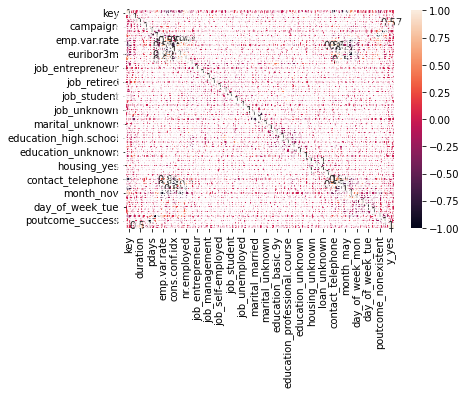

In [34]:
relation=final.corr()
sns.heatmap(relation,annot=True)

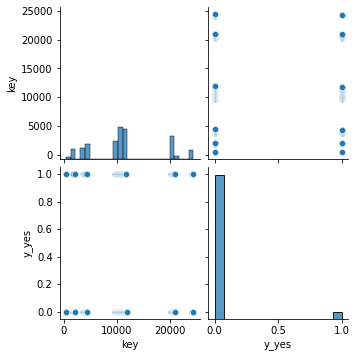

In [37]:
sns.pairplot(final,vars=['key','y_yes'])
plt.show()


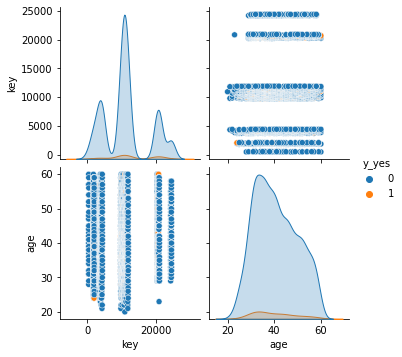

In [50]:
sns.pairplot(final,hue='y_yes',vars=['key','age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


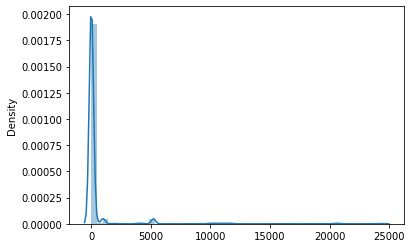

In [38]:
sns.distplot(final)
plt.show()

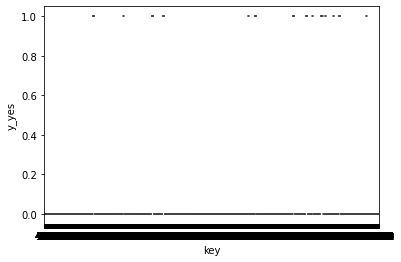

In [51]:
sns.boxplot(x='key',y='y_yes',data=final)

In [55]:
final.to_csv('loan_data.csv')